# Confidence Interval of a Mean

## Introduction

In biostatistics, we often estimate characteristics of a larger population from a smaller sample. But how confident are we in those estimates? This chapter introduces the concept of **confidence intervals** — a powerful tool that tells us how reliable our estimates are likely to be.

Confidence intervals are like a range of plausible values, instead of just a single number. We'll learn how to calculate and interpret these intervals for the most important statistic in biostatistics: the mean.

By the end of this chapter, we'll understand how confidence intervals work, how to use them to make stronger conclusions about our data, and how to avoid common misunderstandings. Whether we're new to statistics or just looking for a refresher, this chapter will give us the _confidence_ we need to tackle this essential concept.

## The t-distribution

To determine the width of the confidence interval of a mean, we utilize a constant called the **critical value** from the **t-distribution**, or the **critical t-value** denoted as $t^*$. The t-distribution is similar to the standard normal distribution but is used when the population standard deviation is unknown and estimated from the sample. The choice of $t^*$ depends on the desired **confidence level** and the **degrees of freedom** ($\text{df}$), which is calculated as $\text{df} = n - 1$. In general, $\text{df}$ equals the number of data points $n$ minus the number of parameters being estimated.

### Origin of the t-distribution

The t-distribution was developed by William Sealy Gosset, a chemist working for the Guinness brewery in the early 20th century. He published his work under the pseudonym "Student" due to company restrictions. The distribution arose from Gosset's need to make inferences about the mean of a normally distributed population when the sample size was small and the population standard deviation was unknown. The t-distribution is similar to the standard normal distribution (z-distribution) but has heavier tails, especially with smaller sample sizes. As the sample size increases, the t-distribution approaches the z-distribution.

### Using `scipy.stats` to obtain t-values

The [`scipy.stats` module](https://docs.scipy.org/doc/scipy/reference/stats.html) in Python provides a convenient way to work with the t-distribution and obtain critical t-values. For a _two-tailed confidence interval_, the expression $1 - \alpha/2$ is used to find the critical t-value, with $\alpha$ the _signifcance level_, also called the _complement of the confidence level_.

In [1]:
from scipy.stats import t

# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate alpha (for two-tailed test)
alpha = 1 - confidence_level

# Define the degrees of freedom (e.g., sample size - 1)
df = 27

# Calculate the critical t-value (two-tailed)
t_critical = t.ppf(1 - alpha/2, df)  # ppf is the percent point function (inverse of CDF)

print(f"The critical t-value for a {100*confidence_level}% confidence interval with {df} degrees of freedom is {t_critical:.4f}")

The critical t-value for a 95.0% confidence interval with 27 degrees of freedom is 2.0518


To access a wider range of t-values for various confidence levels and degrees of freedom, we can generate the following table.

In [2]:
import pandas as pd

# Confidence levels
confidence_levels = [0.80, 0.90, 0.95, 0.975, 0.99] # conf_lev = 1 - alpha

# Degrees of freedom
df_values = list(range(1, 11)) + list(range(50, 201, 50))

# Create an empty dictionary to store t-values
data = {}

# Calculate t-values and populate dictionary
for df in df_values:
    t_values = [t.ppf((1 + conf_lev) / 2, df) for conf_lev in confidence_levels]
    data[df] = t_values

# Create a DataFrame from the dictionary
df = pd.DataFrame(data, index=confidence_levels)

# Format the table
df.index.name = r'1-$\alpha$'
df.columns.name = 'df'

# Print the table
print("Critical values of the t-distribution for various degrees of freedom (columns) and confidence levels (rows)")
print("===========================================================================================================")
print(df.round(3).to_markdown(numalign='left', stralign='left'))

Critical values of the t-distribution for various degrees of freedom (columns) and confidence levels (rows)
| 1-$\alpha$   | 1      | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9     | 10    | 50    | 100   | 150   | 200   |
|:-------------|:-------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|:------|
| 0.8          | 3.078  | 1.886 | 1.638 | 1.533 | 1.476 | 1.44  | 1.415 | 1.397 | 1.383 | 1.372 | 1.299 | 1.29  | 1.287 | 1.286 |
| 0.9          | 6.314  | 2.92  | 2.353 | 2.132 | 2.015 | 1.943 | 1.895 | 1.86  | 1.833 | 1.812 | 1.676 | 1.66  | 1.655 | 1.653 |
| 0.95         | 12.706 | 4.303 | 3.182 | 2.776 | 2.571 | 2.447 | 2.365 | 2.306 | 2.262 | 2.228 | 2.009 | 1.984 | 1.976 | 1.972 |
| 0.975        | 25.452 | 6.205 | 4.177 | 3.495 | 3.163 | 2.969 | 2.841 | 2.752 | 2.685 | 2.634 | 2.311 | 2.276 | 2.264 | 2.258 |
| 0.99         | 63.657 | 9.925 | 5.841 | 4.604 | 4.032 | 3.707 | 3.499 | 3.355 | 3.25  | 3.169 | 2.678 | 2.626 

### Sign of the t-critical value

The t-distribution is symmetrical around zero, meaning that the probability density is the same for positive and negative t-values with the same absolute value.

In a _one-tailed_ test, we're interested in whether the population mean is significantly greater than or less than a specific value.

- Left-tailed test: The critical t-value will be negative because we're looking for evidence in the left tail of the distribution.
- Right-tailed test: The critical t-value will be positive because we're looking for evidence in the right tail of the distribution.

In a _two-tailed_ test or when calculating a confidence interval, we consider both tails of the distribution.

- We'll typically get two critical t-values: one positive and one negative, corresponding to the upper and lower bounds of the confidence interval or the rejection regions in a two-tailed test.

In [3]:
# Parameters
df = 11  # Degrees of freedom (n - 1)
confidence_level = 0.95

# Calculate critical t-values
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, df)

# Or we can calculate critical t-values using ppf directly
# note that 0.975 - 0.025 = 0.95
t_critical_lower = t.ppf(0.025, df)  # Lower critical value at q = 0.025
t_critical_upper = t.ppf(0.975, df)  # Upper critical value at q = 0.975
print(f"For a {100*confidence_level}% confidence interval with {df} degrees of freedom:")
print(f"The lower critical t-value is {t_critical_lower:.1f} \
({100*(1-confidence_level)/2:.2f}% of the area under the curve is to the left of this value)")
print(f"The upper critical t-value is {t_critical_upper:.1f} \
({100*(1-confidence_level)/2:.2f}% of the area under the curve is to the right of this value)")

For a 95.0% confidence interval with 11 degrees of freedom:
The lower critical t-value is -2.2 (2.50% of the area under the curve is to the left of this value)
The upper critical t-value is 2.2 (2.50% of the area under the curve is to the right of this value)


### Visualizing the t-distribution

To gain a deeper understanding of this distribution, let's visualize its shape and key properties.

The plot generated below depicts the **probability density function (PDF)** of the t-distribution for a specific degrees of freedom (df) value. This curve represents the likelihood of different t-values occurring under this distribution.

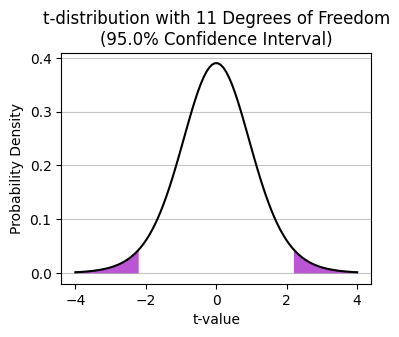

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
df = 11  # Degrees of freedom (n - 1)
confidence_level = 0.95

# Calculate critical t-values
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha / 2, df)

# Or we can calculate critical t-values using ppf directly
# note that 0.975 - 0.025 = 0.95
t_critical_lower = t.ppf(0.025, df)  # Lower critical value at q = 0.025
t_critical_upper = t.ppf(0.975, df)  # Upper critical value at q = 0.975

# Generate x values for the plot
x = np.linspace(-4, 4, 100)  # Range from -4 to 4 standard deviations

# Calculate t-distribution PDF values
y = t.pdf(x, df)

# Create the plot
plt.figure(figsize=(4, 3))
plt.plot(x, y, 'k', label=f"t-distribution (df={df})")

# Shade confidence interval areas
# plt.fill_between(x, y, where=((x < -t_critical) | (x > t_critical)), color='mediumorchid',)
plt.fill_between(x, y, where=((x < t_critical_lower) | (x > t_critical_upper)), color='mediumorchid',)

# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title(f"t-distribution with {df} Degrees of Freedom\n({100*confidence_level}% Confidence Interval)")

# Show the plot
plt.grid(axis='y', alpha=0.75);

Notice that:

- Bell-shaped: Similar to the standard normal distribution, the t-distribution is symmetrical and bell-shaped.
- Heavier tails: The tails of the t-distribution are thicker than those of the standard normal distribution, especially for smaller degrees of freedom. This reflects the increased uncertainty associated with smaller sample sizes.
- Approaches normal distribution: As the degrees of freedom increase (i.e., with larger sample sizes), the t-distribution approaches the standard normal distribution.

The shaded areas in the plot highlight the _95% confidence interval_. This means that if we were to repeatedly sample from the population and calculate confidence intervals using the t-distribution, 95% of those intervals would contain the true population mean. The critical t-values that define the boundaries of this interval, i.e., 2.5% probability in each tail, are calculated using the `t.ppf` function, as discussed in the previous chapters.

Let's now plot multiple t-distributions with varying degrees of freedom on the same graph, to illustrate how the shape changes as the sample size increases.

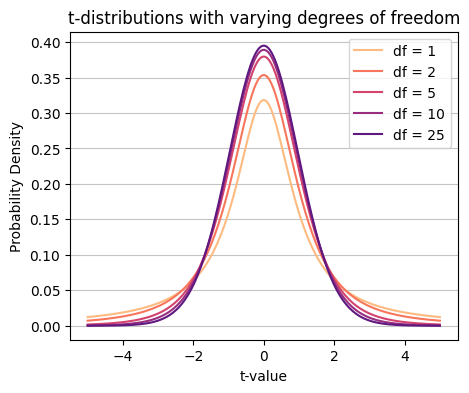

In [5]:
import seaborn as sns
sns.set_palette("magma_r")

# Degrees of freedom
df_values = [1, 2, 5, 10, 25]

# Generate x values for the plot
x = np.linspace(-5, 5, 200)

# Create the plot
plt.figure(figsize=(5, 4))
for df in df_values:
    # Calculate t-distribution PDF values
    y = t.pdf(x, df)

    # Plot the t-distribution
    plt.plot(x, y, label=f'df = {df}')

# Add labels and title
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('t-distributions with varying degrees of freedom')
plt.legend()

# Show the plot
plt.grid(axis='y', alpha=0.75);

The plot illustrates the following key characteristics of t-distributions:

- Bell-shaped: All t-distributions are bell-shaped and symmetric around zero.
- Heavier tails with smaller df: The t-distributions with smaller degrees of freedom (e.g., df = 2) have heavier tails compared to those with larger degrees of freedom (e.g., df = 100). This indicates a higher probability of obtaining extreme values (far from the mean) when the sample size is small.
- Approaches **Normal Distribution**: As the degrees of freedom increase, the t-distribution becomes more and more similar to the standard normal distribution (z-distribution). This is evident in the plot, where the curve for df = 100 closely resembles the standard normal curve.

This convergence is a consequence of the Central Limit Theorem (CLT), which states that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the shape of the original population distribution. Since degrees of freedom are directly related to sample size (df = n - 1), as df increases, the sample size also increases, and the t-distribution becomes increasingly similar to the standard normal distribution.

In principle, when the sample size is large (typically $n > 30$), the t-distribution and the standard normal distribution are very close. In this case, we can use either the **z-score** or the **t-value** for the CI calculations, and the results will be virtually identical.

## Calculating the confidence interval of a mean

The most common method of computing the confidence interval (CI) of a mean assumes that the data are sampled from a population that follows a _normal distribution_. The CI is centered around the sample mean $m$. To calculate its width, we need to consider the standard deviation $s$, the number of values in the sample $n$, and the desired degree of confidence (typically 95%).

### Calculating the t-statistic

While we can use the t-distribution to calculate confidence intervals and test hypotheses about the population mean, it's important to distinguish between the _t-statistic_ (calculated from the sample data) and the _critical t-value_ (obtained from the t-distribution as shown above).

Suppose we have a population that is normally distributed, with known parameters $\mu$ (mean) and $\sigma$ (standard deviation). By taking multiple random samples of size $n$ from this population, we can compute the sample mean ($m$) and sample standard deviation ($s$) for each. Then, for each sample, we can calculate the **t-statistic** ($t$):

$$t=\frac{m - \mu}{s / \sqrt{n}}$$

- The t-statistic tells us how extreme your sample mean is compared to the hypothesized population mean, under the assumption that the null hypothesis is true (i.e., the true population mean is equal to the hypothesized value).
- A larger absolute value of $t$ indicates a more significant difference between the sample mean and the hypothesized population mean.
- The sign of $t$ indicates whether the sample mean is larger (+) or smaller (-) than the hypothesized population mean.

For example, suppose we want to test whether a new drug has an effect on blood pressure. We collect a sample of 30 patients and measure their blood pressure after taking the drug. The sample mean (m) is 120 mmHg, and the sample standard deviation (s) is 15 mmHg. Our hypothesize that the population mean blood pressure with the drug ($\mu$) is 130 mmHg.

In [6]:
t_stat = (120 - 130) / (15 / np.sqrt(30))
print(f"The t-statistic in this sample = {t_stat:.3f}")

The t-statistic in this sample = -3.651


The result indicates that the sample mean is 3.651 standard errors _lower_ than the hypothesized population mean of 130 mmHg.

Once we've calculated the t-statistic, we can use the t-distribution to determine:

- P-value: The probability of observing a t-statistic as extreme as or more extreme than the one calculated, assuming the null hypothesis is true. A smaller p-value provides stronger evidence against the null hypothesis.
- Critical t-value: The t-value that corresponds to your chosen significance level (alpha) and degrees of freedom. If our calculated t-statistic is more extreme than the critical t-value, you reject the null hypothesis.

### The flip!

For any individual sample, we know the specific values for the sample mean, standard deviation, and size. The population mean, though, remains hidden. Our goal is to _estimate this population mean_ while quantifying our level of uncertainty. To achieve this, we can calculate a confidence interval (CI) as follows:

$$\mu = m \pm t^* \times \frac{s}{\sqrt{n}}$$

To estimate the population mean with a specified level of confidence, we can employ the t-distribution and follow this procedure:

1. Calculate the sample mean (m) and sample standard deviation (s)
2. Determine the degrees of freedom (df = n - 1)
3. Choose a confidence level (e.g., 95%)
4. Find the critical t-value ($t^*$)
5. Calculate the margin of error as $W = \frac{t^* \times s}{\sqrt{n}}$
6. Construct the confidence interval, as $\text{CI} = m \pm W$

As the number of observations in a sample increases, the sample statistics tend to converge towards the actual population parameters. This means that the t-distribution, used when the population standard deviation is unknown, closely resembles the z-distribution (standard normal distribution) in larger samples. Therefore, for samples of 50 or more observations, the choice between using the t-distribution or z-distribution for calculating confidence intervals or p-values becomes less critical, as the results will be practically identical. In some later models, we may see references to either t-statistics or z-statistics, but remember that this distinction is mainly significant for smaller sample sizes.

### Example

To illustrate the effect of sample size on the confidence interval, we will simulate two datasets of body temperatures with different sample sizes (n=12 and n=130). We will assume the body temperatures are _normally distributed_ with a population mean of 36.8 and a standard deviation of 0.4. We will then calculate and visualize the 95% confidence intervals for each sample using point plots.

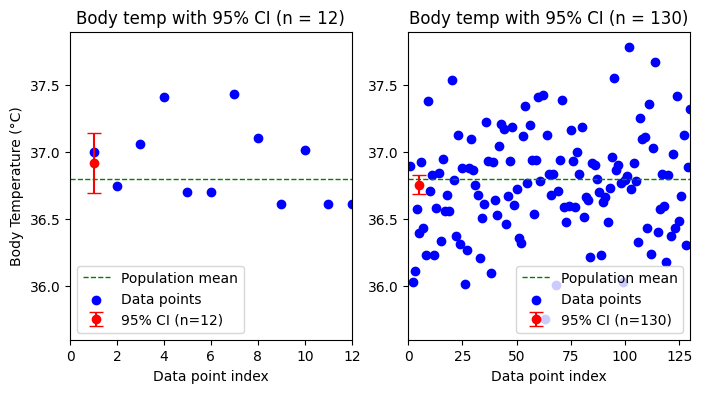

In [7]:
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Population parameters
pop_mean = 36.8
pop_std = 0.4

# Sample sizes
n1 = 12
n2 = 130

# Generate samples
sample1 = np.random.normal(pop_mean, pop_std, n1)
sample2 = np.random.normal(pop_mean, pop_std, n2)

# Calculate sample means and standard errors
sample_mean1 = np.mean(sample1)
sample_mean2 = np.mean(sample2)
std_error1 = pop_std / np.sqrt(n1)
std_error2 = pop_std / np.sqrt(n2)

# Calculate z-critical value for 95% CI (since pop std is known)
z_crit = norm.ppf(0.975)  # ppf gives you z score for 97.5%

# Calculate margin of error
margin_error1 = z_crit * std_error1
margin_error2 = z_crit * std_error2

# Calculate confidence intervals
ci_lower1 = sample_mean1 - margin_error1
ci_upper1 = sample_mean1 + margin_error1
ci_lower2 = sample_mean2 - margin_error2
ci_upper2 = sample_mean2 + margin_error2

# Create point plots with confidence intervals
plt.figure(figsize=(8, 4))
plt.subplot(121)  # 1 row, 2 columns, subplot 1
plt.errorbar([1], [sample_mean1], yerr=margin_error1, fmt='ro', capsize=5, label=f'95% CI (n={n1})')
plt.axhline(pop_mean, color='g', linestyle='dashed', linewidth=1, label='Population mean')
plt.scatter(range(1, n1 + 1), sample1, color='b', label='Data points')
plt.xlabel('Data point index')
plt.xlim(0,12)
plt.ylabel('Body Temperature (°C)')
plt.ylim(35.6, 37.9)
plt.title(f'Body temp with 95% CI (n = {n1})')
plt.legend()

plt.subplot(122)  # 1 row, 2 columns, subplot 2
plt.errorbar([5], [sample_mean2], yerr=margin_error2, fmt='ro', capsize=5, label=f'95% CI (n={n2})')
plt.axhline(pop_mean, color='g', linestyle='dashed', linewidth=1, label='Population mean')
plt.scatter(range(1, n2 + 1), sample2, color='b', label='Data points')
plt.xlabel('Data point index')
plt.xlim(0,130)
plt.title(f'Body temp with 95% CI (n = {n2})')
plt.ylim(35.6, 37.9)
plt.legend();

Let's calculate manually the CIs using the t-distribution in both cases.

In [8]:
# Population parameters (known)
pop_mean = 36.8
pop_std = 0.4

# Sample sizes
n1 = 12
n2 = 130

# Generate samples (for demonstration purposes)
np.random.seed(42)  # for reproducibility
sample1 = np.random.normal(pop_mean, pop_std, n1)
sample2 = np.random.normal(pop_mean, pop_std, n2)

# Calculate sample means
sample_mean1 = np.mean(sample1)
sample_mean2 = np.mean(sample2)

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Calculate critical t-value
t_critical1 = t.ppf(1 - alpha/2, n1-1)
t_critical2 = t.ppf(1 - alpha/2, n2-1)

# Calculate standard error of the mean
standard_error1 = pop_std / np.sqrt(n1)
standard_error2 = pop_std / np.sqrt(n2)

# Calculate margin of error
margin_error1 = t_critical1 * standard_error1
margin_error2 = t_critical2 * standard_error2

# Calculate confidence intervals
ci_lower1 = sample_mean1 - margin_error1
ci_upper1 = sample_mean1 + margin_error1
ci_lower2 = sample_mean2 - margin_error2
ci_upper2 = sample_mean2 + margin_error2

# Print the results
print(f"Sample size n1 = {n1}:")
print(f"  Sample mean: {sample_mean1:.3f}")
print(f"  95% Confidence Interval: ({ci_lower1:.3f}, {ci_upper1:.3f})")

print(f"\nSample size n2 = {n2}:")
print(f"  Sample mean: {sample_mean2:.3f}")
print(f"  95% Confidence Interval: ({ci_lower2:.3f}, {ci_upper2:.3f})")

Sample size n1 = 12:
  Sample mean: 36.918
  95% Confidence Interval: (36.664, 37.173)

Sample size n2 = 130:
  Sample mean: 36.758
  95% Confidence Interval: (36.688, 36.827)


### Python tools for CI calculation

There are several ways to directly calculate confidence intervals (CIs) in Python using various packages.

#### Frequentist - normal distribution

This frequentist method assumes that the data are sampled from a _normally distributed population_, and that the population standard deviation is known. This function calculates the confidence interval based on the **z-score** (standard normal distribution), which is appropriate under these frequentist assumptions. If we have a _large sample size (n > 30)_, the normal distribution is often sufficient.

In [9]:
# Calculate 95% confidence interval (assuming known population std_dev)
confidence_level = 0.95
sample_mean = np.mean(sample2)
# Here, you would typically use the population std_dev if known, 
# or an estimate (e.g., from previous studies)
standard_error1 = pop_std / np.sqrt(len(sample2))
standard_error2 = np.std(sample2, ddof=1) / np.sqrt(len(sample2))

ci1 = norm.interval(confidence_level, loc=sample_mean, scale=standard_error1)
ci2 = norm.interval(confidence_level, loc=sample_mean, scale=standard_error2)

print(f"95% Confidence Interval (known population SD): ({ci1[0]:.3f}, {ci1[1]:.3f})")
print(f"95% Confidence Interval (estimated SD): ({ci2[0]:.3f}, {ci2[1]:.3f})")

95% Confidence Interval (known population SD): (36.689, 36.826)
95% Confidence Interval (estimated SD): (36.692, 36.823)


#### Frequentist - small sample size

Other frequentist methods provide a convenient way to calculate the confidence interval for a mean using the **t-distribution**. It takes the data as input and returns the confidence interval directly. If we have a _small sample size_ and don't know the population standard deviation, the t-distribution is generally the most appropriate choice.

In [10]:
import statsmodels.api as sm

confidence_level = 0.95
# Calculate 95% confidence interval
ci = sm.stats.DescrStatsW(sample1).tconfint_mean(alpha=1-confidence_level) 

print(f"95% Confidence Interval (t-distribution, estimated SD): ({ci[0]:.3f}, {ci[1]:.3f})")

95% Confidence Interval (t-distribution, estimated SD): (36.729, 37.108)


In [11]:
confidence_level = 0.95
sample_mean = np.mean(sample1)
standard_error = np.std(sample1, ddof=1) / np.sqrt(len(sample1))
ci = t.interval(confidence_level, len(sample1) - 1, loc=sample_mean, scale=standard_error)

print(f"95% Confidence Interval (t-distribution, estimated SD): ({ci[0]:.3f}, {ci[1]:.3f})")

95% Confidence Interval (t-distribution, estimated SD): (36.729, 37.108)


#### Bayesian approach

In contrast to the frequentist methods we've discussed, the **Bayesian** approach directly incorporates the data to estimate a dataset's mean, variance, and standard deviation.

In [12]:
from scipy.stats import bayes_mvs

# Calculate 95% Bayesian confidence interval for the mean
result = bayes_mvs(sample2, alpha=0.95)
ci_lower, ci_upper = result[0][1]  # Extract lower and upper bounds from the result object

print(f"95% Bayesian Confidence Interval: ({ci_lower:.3f}, {ci_upper:.3f})")

95% Bayesian Confidence Interval: (36.691, 36.824)


#### Bootstrap

A final alternative is the **bootstrap** method, a powerful **non-parametric** approach for calculating confidence intervals. This method doesn't assume any particular distribution for the data, making it well-suited for analyzing complex or non-normal datasets.

In [13]:
import pingouin as pg

# Calculate 95% percentile bootstrap confidence interval
ci = pg.compute_bootci(sample2, func='mean', confidence=0.95, method='percentile')

print(f"95% Percentile Bootstrap Confidence Interval: ({ci[0]:.3f}, {ci[1]:.3f})")

95% Percentile Bootstrap Confidence Interval: (36.700, 36.820)


This **resampling** method offers a flexible alternative to traditional statistical methods, as it doesn't require the assumption of a normal (Gaussian) or any specific distribution for the data. Here's how it works:

- Create numerous "pseudosamples": Repeatedly draw random samples (with replacement) from the original dataset, **each with the same size as the original**.
- Calculate the statistic of interest: For each pseudosample, compute the mean (or any other parameter we're interested in). This gives a large collection of estimates based on the original data.
- Identify the percentiles: Determine the **2.5th and 97.5th percentiles** of this collection of estimates. This range, which contains 95% of the resampled means, serves as the 95% confidence interval (CI) for the population mean.

Remarkably, this resampling-based CI often aligns closely with the CI calculated using the conventional method that assumes a normal distribution. Extensive theoretical and simulation studies have validated this approach, leading some statisticians to advocate for its wider adoption.

The underlying principle behind resampling's effectiveness is the Central Limit Theorem (again ;-). This theorem states that as you take more and more simple random samples from a population, the distribution of the sample means will approximate a normal distribution, regardless of the original population's distribution. In other words, the average of the sample means will converge towards the true population mean as the number of samples increases.

2.5th percentile: 36.767
97.5th percentile: 37.084


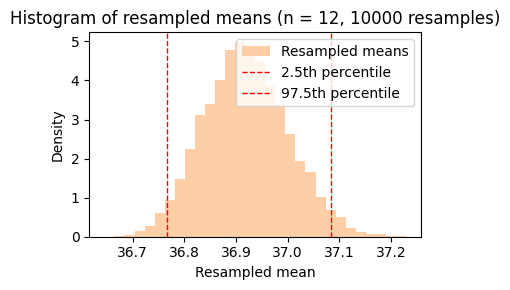

In [14]:
# Number of resamples
num_resamples = 10000

# Resampling and mean calculation
# !Make sure to choose exactly N elements randomly **with replacement**
# from the original N-data point set, e.g., size=12 for sample1 set
resampled_means = [np.random.choice(sample1, size=len(sample1), replace=True).mean() for _ in range(num_resamples)]

# Calculate percentiles
percentile_2_5 = np.percentile(resampled_means, 2.5)
percentile_97_5 = np.percentile(resampled_means, 97.5)

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(resampled_means, bins=30, density=True, alpha=0.7, label='Resampled means')
plt.axvline(percentile_2_5, color='r', linestyle='dashed', linewidth=1, label='2.5th percentile')
plt.axvline(percentile_97_5, color='r', linestyle='dashed', linewidth=1, label='97.5th percentile')
plt.xlabel('Resampled mean')
plt.ylabel('Density')
plt.title(f'Histogram of resampled means (n = 12, {num_resamples} resamples)')
plt.legend()
plt.tight_layout();

# Print percentiles
print(f"2.5th percentile: {percentile_2_5:.3f}")
print(f"97.5th percentile: {percentile_97_5:.3f}")

## The CI and the SEM

We might have noticed the term "standard error" or "standard error of the mean" (SEM) appearing in previous calculations of the margin of error. Let's take a closer look at the relationship between the confidence interval (CI) and the SEM, as they both play crucial roles in understanding the precision of our estimates.

A point estimate, such as the sample mean, gives us a single value to estimate a population parameter. However, estimates vary from sample to sample due to random sampling error. A confidence interval addresses this uncertainty by providing a range around the point estimate. This range is constructed to capture the true population parameter with a certain degree of confidence, often set at 95%. Wider intervals offer greater confidence in capturing the true parameter, but at the cost of reduced precision.

Recall that the SEM is a measure of how much the sample mean is expected to vary from sample to sample. It's calculated as $\text{SEM}=\frac{s}{\sqrt{n}}$. It quantifies the variability we expect to see in sample means due to random sampling error. A smaller SEM indicates that the sample mean is likely to be closer to the true population mean.

The margin of error in a confidence interval is directly related to the SEM. It's calculated by multiplying the SEM by a critical value (either from the t-distribution or the z-distribution) that corresponds to our desired confidence level: $W=t^* \times \text{SEM}$. The critical value depends on the chosen confidence level (e.g., 95% or 99%) and the degrees of freedom (if using the t-distribution).

Therefore, the confidence interval is essentially constructed by adding and subtracting the margin of error from the sample mean: $\text{CI} = m \pm W$.

In essence, the confidence interval uses the SEM as a building block to create a range of plausible values for the population mean. The width of the confidence interval reflects the level of uncertainty in our estimate:

- Narrow CI: Smaller SEM, more precise estimate
- Wide CI: Larger SEM, less precise estimate

As we saw in the previous figure, larger samples tend to yield more precise estimates of population statistics, reflected in their narrower distributions. The standard deviation of a statistic derived from a sample is called the standard error of that statistic.  In the case of the sample mean, the standard error of the mean (SEM) is given by:

$$\text{SE} = \frac{\sigma}{\sqrt{n}}$$

where $\sigma$ is the (sample) standard deviation and $n$ is the sample size. It's important to remember that this calculation relies on the assumption that the sample standard deviation closely mirrors the population standard deviation, which is generally acceptable for samples of moderate or larger size. As the formula illustrates, the standard error of the mean (SEM) is inversely proportional to the square root of the sample size. This confirms our intuitive understanding that larger samples lead to more precise estimates of the population mean, as evidenced by the smaller SEM.

## The CI of the SD

Confidence intervals (CIs) are a versatile tool in statistics, applicable to a wide range of values calculated from sample data, not just the mean. Under similar assumptions used for interpreting the CI of the mean - a roughly Gaussian population distribution, a random and representative sample, independent observations, accurate data, and a meaningful outcome - a 95% CI allows us to be 95% confident that the calculated interval captures the true population parameter of interest, whether it's the standard deviation, a proportion, or another statistic.

The normal distribution, being a frequency or probability distribution, provides a framework for interpreting the standard error. It serves as a fundamental unit of measurement for the uncertainty around our sample mean. By considering larger multiples of the standard error around the sample mean, we gain greater confidence that the resulting interval encompasses the true population mean.

To determine the precise multiple of the standard error needed for a 95% probability of capturing the true population mean, we utilize the t-distribution. The t-distribution, closely related to the normal distribution, acknowledges the inherent uncertainty introduced when we estimate the population standard deviation from our sample data. For a single sample mean, we specifically employ the t-distribution with n-1 degrees of freedom.

## Conclusion

In this chapter, we've explored the fundamental concept of confidence intervals and their essential role in statistical inference. We've learned that confidence intervals provide a range of plausible values for population parameters, like the mean, and quantify the uncertainty associated with those estimates.

We delved into the different methods for calculating confidence intervals, including the t-distribution for smaller samples and the z-distribution for larger ones. We also explored the Bayesian approach, which incorporates prior information, and the non-parametric bootstrap method, which is particularly useful for complex or non-normal data.

We've seen how confidence intervals can be visualized using plots, helping us grasp the relationship between sample size, variability, and precision. We also examined the close connection between confidence intervals and the standard error of the mean, a key measure of the uncertainty in our sample mean estimate.

By mastering confidence intervals, we've gained a powerful tool for analyzing data and drawing meaningful conclusions in the field of biostatistics. But confidence intervals are not just about numbers; they are about understanding the uncertainty inherent in estimation and making informed decisions based on that understanding.

## Session Information

The output below details all packages and version necessary to reproduce the results in this report.

In [15]:
!python --version
print("-------------")
# List of packages we want to check the version
packages = ['numpy', 'pandas', 'scipy', 'statsmodels', 'pingouin', 'matplotlib', 'seaborn']

# Initialize an empty list to store the versions
versions = []

# Loop over the packages
for package in packages:
    # Get the version of the package
    output = !pip show {package} | findstr "Version"
    # If the output is not empty, get the version
    if output:
        version = output[0].split()[-1]
    else:
        version = 'Not installed'
    # Append the version to the list
    versions.append(version)

# Print the versions
for package, version in zip(packages, versions):
    print(f'{package}: {version}')

Python 3.12.3
-------------
numpy: 1.26.4
pandas: 2.2.2
scipy: 1.13.0
statsmodels: 0.14.2
pingouin: 0.5.4
matplotlib: 3.8.4
seaborn: 0.13.2
